In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#pip install vincent
import vincent
vincent.core.initialize_notebook()

In [8]:
excel="census_breweries_wineries_distilleries_state.xlsx"
cons_census_df = pd.read_excel(excel)
cons_census_df.head()

,tot_pop,male_pop,female_pop,median_age,median_age_male,median_age_female,employ_status_tot,employ_status_working,employ_status_working_civ,employ_status_working_civ_employed,...,FIPS,State,Abbrev,brewery_count,winery_count,craft_distillery_count,tot_k_pop,breweries_k_pop,wineries_k_pop,distilleries_k_pop
0,4841164,2346193,2494971,38.6,37.1,40.0,3864302,2238654,2226504,2042025,...,1,Alabama,AL,22,35,8,4841.164,0.004544,0.007230,0.001652
1,736855,385296,351559,33.6,33.3,34.0,568732,400475,384093,353954,...,2,Alaska,AK,19,8,6,736.855,0.025785,0.010857,0.008143
2,6728577,3344106,3384471,37.1,35.8,38.4,5290839,3146717,3129344,2879372,...,4,Arizona,AZ,37,94,19,6728.577,0.005499,0.013970,0.002824
3,2968472,1456694,1511778,37.7,36.4,39.2,2339307,1364187,1359742,1266552,...,5,Arkansas,AR,14,33,3,2968.472,0.004716,0.011117,0.001011
4,38654206,19200970,19453236,36.0,34.9,37.1,30565746,19391320,19260868,17577142,...,6,California,CA,315,4816,118,38654.206,0.008149,0.124592,0.003053


In [9]:
# Dataframe for just brewery count
brewery_state_count_df = cons_census_df[["Abbrev", "brewery_count"]].copy()
brewery_state_count_df.set_index(["Abbrev"], inplace=True)
brewery_state_count_df.head()

,brewery_count
Abbrev,
AL,22
AK,19
AZ,37
AR,14
CA,315


In [10]:
# Dataframe for just breweries per 1000 people by state
brewery_per_person_df = cons_census_df[["Abbrev", "breweries_k_pop"]].copy()
brewery_per_person_df.set_index(["Abbrev"], inplace=True)
brewery_per_person_df.head()

,breweries_k_pop
Abbrev,
AL,0.004544
AK,0.025785
AZ,0.005499
AR,0.004716
CA,0.008149


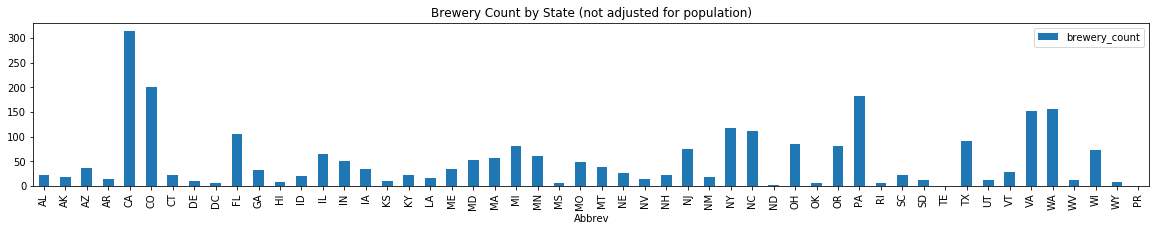

In [13]:
# Plotting brewery count by state
brewery_count = brewery_state_count_df.plot(kind="bar", figsize=(20,3), title = "Brewery Count by State (not adjusted for population)")
plt.show(brewery_count)
brewery_count.figure.savefig("brewery_count.png")

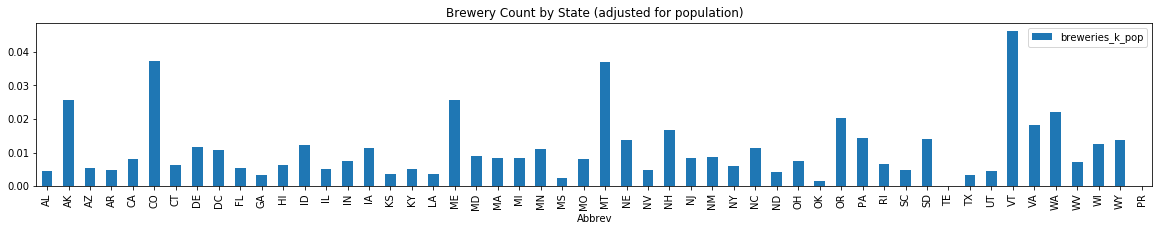

In [14]:
# Plotting breweries per 1000 people by state
brewery_person = brewery_per_person_df.plot(kind="bar", figsize=(20,3), title = "Brewery Count by State (adjusted for population)")
plt.show(brewery_person)
brewery_person.figure.savefig("brewery_person.png")

In [18]:
# Dataframe for just winery count
winery_count_df = cons_census_df[["Abbrev", 'winery_count']].copy()
winery_count_df.set_index(["Abbrev"], inplace=True)
winery_count_df.head()

,winery_count
Abbrev,
AL,35
AK,8
AZ,94
AR,33
CA,4816


In [19]:
# Dataframe for just wineries per 1000 peole by state
winery_per_person_df = cons_census_df[["Abbrev", "wineries_k_pop"]].copy()
winery_per_person_df.set_index(["Abbrev"], inplace=True)
winery_per_person_df.head()

,wineries_k_pop
Abbrev,
AL,0.007230
AK,0.010857
AZ,0.013970
AR,0.011117
CA,0.124592


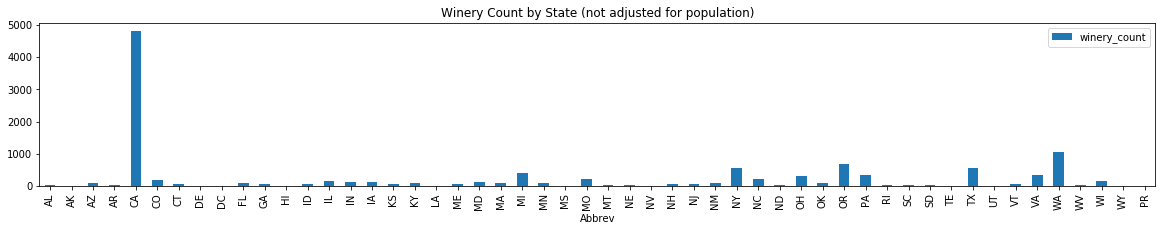

In [20]:
# Plotting winery count by state
winery_count = winery_count_df.plot(kind="bar", figsize=(20,3), title = "Winery Count by State (not adjusted for population)")
plt.show(winery_count)
winery_count.figure.savefig("winery_count.png")

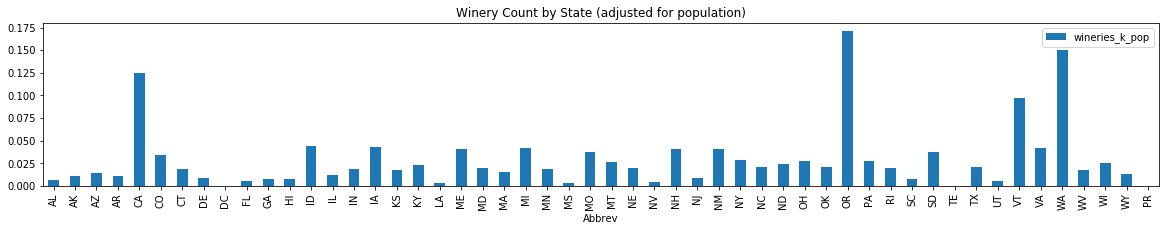

In [21]:
# Plotting wineries per 1000 people by state
winery_person = winery_per_person_df.plot(kind="bar", figsize=(20,3), title = "Winery Count by State (adjusted for population)")
plt.show(winery_person)
winery_person.figure.savefig("winery_person.png")

In [22]:
# Dataframe for just distillery count
distillery_count_df = cons_census_df[["Abbrev", 'craft_distillery_count']].copy()
distillery_count_df.set_index(["Abbrev"], inplace=True)
distillery_count_df.head()

,craft_distillery_count
Abbrev,
AL,8
AK,6
AZ,19
AR,3
CA,118


In [25]:
# Dataframe for just distillery per 1000 peole by state
distillery_per_person_df = cons_census_df[["Abbrev", "distilleries_k_pop"]].copy()
distillery_per_person_df.set_index(["Abbrev"], inplace=True)
distillery_per_person_df.head()

,distilleries_k_pop
Abbrev,
AL,0.001652
AK,0.008143
AZ,0.002824
AR,0.001011
CA,0.003053


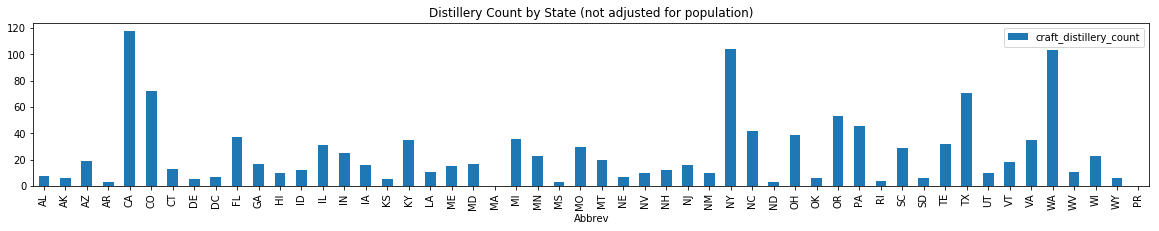

In [27]:
# Plotting distillery count by state
distillery_count = distillery_count_df.plot(kind="bar", figsize=(20,3), title = "Distillery Count by State (not adjusted for population)")
plt.show(distillery_count)
distillery_count.figure.savefig("distillery_count.png")

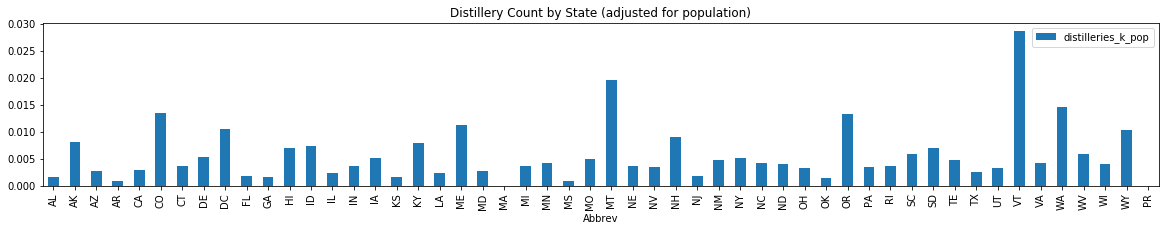

In [28]:
# Plotting distilleries per 1000 people by state
distillery_person = distillery_per_person_df.plot(kind="bar", figsize=(20,3), title = "Distillery Count by State (adjusted for population)")
plt.show(distillery_person)
distillery_person.figure.savefig("distillery_person.png")

In [29]:
# Creating a dataframe with all the counts not adjusted for population
alc_count_df = cons_census_df[["Abbrev", "winery_count", 'brewery_count', "craft_distillery_count"]].copy()
alc_count_df.set_index(["Abbrev"], inplace=True)
alc_count_df.head()

,winery_count,brewery_count,craft_distillery_count
Abbrev,,,
AL,35,22,8
AK,8,19,6
AZ,94,37,19
AR,33,14,3
CA,4816,315,118


In [32]:
# Creating a stacked bar chart based on straight count
stack = vincent.StackedBar(alc_count_df)
stack.axis_titles(x='State', y='Count (unadjusted for population)')
stack.legend(title='Alcohol Type')
#stack.colors(brew="Spectral")
stack.display()
plt.savefig("count_stacked.png")

<Figure size 432x288 with 0 Axes>

In [33]:
# Creating a dataframe with all the counts not adjusted for population
alc_person_df = cons_census_df[["Abbrev", "wineries_k_pop", "breweries_k_pop", "distilleries_k_pop"]].copy()
alc_person_df.set_index(["Abbrev"], inplace=True)
alc_person_df.head()

,wineries_k_pop,breweries_k_pop,distilleries_k_pop
Abbrev,,,
AL,0.007230,0.004544,0.001652
AK,0.010857,0.025785,0.008143
AZ,0.013970,0.005499,0.002824
AR,0.011117,0.004716,0.001011
CA,0.124592,0.008149,0.003053


In [32]:
# Creating a stacked bar chart based on adjusted count
stack2 = vincent.StackedBar(alc_person_df)
stack2.axis_titles(x='State', y='Count (adjusted for population)')
stack2.legend(title='Alcohol Type')
#stack2.colors(brew="Spectral")
stack2.display()
plt.savefig("adj_count_stacked.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [34]:
# getting total counts of wineries, breweries, and distilleries in the united states
winery_sum = alc_count_df["winery_count"].sum()
brewery_sum = alc_count_df["brewery_count"].sum()
distillery_sum = alc_count_df["craft_distillery_count"].sum()

sum_df = pd.DataFrame({"Winery Sum": winery_sum, "Brewery Sum": brewery_sum, "Distillery Sum": distillery_sum}, index = ["Count"])
sum_df.head()

,Brewery Sum,Distillery Sum,Winery Sum
Count,2713,1290,11991


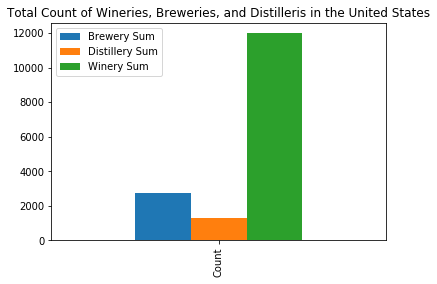

In [38]:
# bar chart of total counts
sum_bar = sum_df.plot(kind="bar", title = "Total Count of Wineries, Breweries, and Distilleris in the United States")
plt.show(sum_bar)
sum_bar.figure.savefig("total_count.png")

In [39]:
excel_all="all_data.xls"
consoldidated_df=pd.read_excel(excel_all)


In [37]:
consoldidated_df.head()

,tot_pop,male_pop,female_pop,median_age,median_age_male,median_age_female,employ_status_tot,employ_status_working,employ_status_working_civ,employ_status_working_civ_employed,...,brewery_count,winery_count,craft_distillery_count,tot_k_pop,breweries_k_pop,wineries_k_pop,distilleries_k_pop,google_brewery_count,google_winery_count,google_distillery_count
0,4841164,2346193,2494971,38.6,37.1,40.0,3864302,2238654,2226504,2042025,...,22,35,8,4841.164,0.004544,0.007230,0.001652,57.0,34.0,4.0
1,736855,385296,351559,33.6,33.3,34.0,568732,400475,384093,353954,...,19,8,6,736.855,0.025785,0.010857,0.008143,34.0,14.0,8.0
2,6728577,3344106,3384471,37.1,35.8,38.4,5290839,3146717,3129344,2879372,...,37,94,19,6728.577,0.005499,0.013970,0.002824,52.0,43.0,12.0
3,2968472,1456694,1511778,37.7,36.4,39.2,2339307,1364187,1359742,1266552,...,14,33,3,2968.472,0.004716,0.011117,0.001011,46.0,39.0,2.0
4,38654206,19200970,19453236,36.0,34.9,37.1,30565746,19391320,19260868,17577142,...,315,4816,118,38654.206,0.008149,0.124592,0.003053,59.0,41.0,29.0


In [45]:
cons_corr=consoldidated_df.corr()

In [46]:
cons_corr.to_csv("correlation.csv")